In [1]:
# Package implementation
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("Hitters.csv")
#  Change Data Type
labelencoder = LabelEncoder()
df['League'] = labelencoder.fit_transform(df['League'])
df['Division'] = labelencoder.fit_transform(df['Division'])
df['NewLeague'] = labelencoder.fit_transform(df['NewLeague'])


#Generate X,Y
X_cols = [i for i in df.columns if i not in ['Salary']]
Y_cols = [i for i in df.columns if i in ['Salary']]
X = df[X_cols]
Y = df[Y_cols]

## Q1_a

In [3]:
def PCR(X,Y,N_Cols,model):
    #PCA
    X = PCA(n_components=N_Cols).fit_transform(X)
    
    X = pd.DataFrame(X)
    
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)
    MSE = []
    
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # fit the model
        model.fit(X_train,y_train)
        # predict
        y_pred = model.predict(X_test)
        loss = mean_squared_error(y_test,y_pred)
        MSE.append(loss)
    return np.mean(MSE)

In [4]:
model = LinearRegression()
PCR(X,Y,19,model)
Error_List = []
Component_List = [i for i in range(1,20)]
for i in range(1,20):
    Error_List.append(PCR(X,Y,i,model))

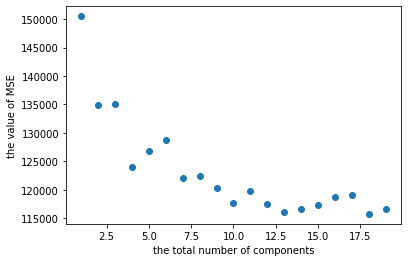

In [5]:
plt.xlabel("the total number of components")
plt.ylabel("the value of MSE")
plt.scatter([i for i in range(1,20)], Error_List)

## Q1_b

115462.2995924692


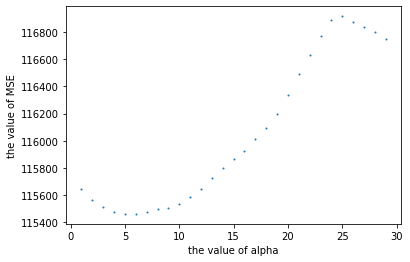

In [8]:
lasso = linear_model.Lasso(fit_intercept=True, alpha=5)
print(PCR(X,Y,18,lasso))
Error_List = []
Component_List = [i for i in range(1,20)]
for i in range(1,30):
    Error_List.append(PCR(X,Y,18,linear_model.Lasso(fit_intercept=True, alpha=i)))
plt.xlabel("the value of alpha")
plt.ylabel("the value of MSE")
plt.scatter([i for i in range(1,30)], Error_List,s = 1)